Install necessary libraries

In [1]:
pip install pandas scikit-learn


Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


Load the dataset

In [3]:

df = pd.read_csv('play_tennis.csv')


View the first few rows of the dataset

In [4]:

print(df.head())


  day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes


Column names

In [5]:
print(df.columns)

Index(['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


Identify Target Column

In [6]:
X = df.drop('play', axis=1)
y = df['play']

Encode the target variable

In [7]:
y = y.map({'M': 1, 'B': 0})

Split the data into train and test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


In [13]:
# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['day', 'outlook', 'wind'], drop_first=True)

# Verify the transformed dataset
print(df_encoded.head())


   temp humidity play  day_D10  day_D11  day_D12  day_D13  day_D14  day_D2  \
0   Hot     High   No    False    False    False    False    False   False   
1   Hot     High   No    False    False    False    False    False    True   
2   Hot     High  Yes    False    False    False    False    False   False   
3  Mild     High  Yes    False    False    False    False    False   False   
4  Cool   Normal  Yes    False    False    False    False    False   False   

   day_D3  day_D4  day_D5  day_D6  day_D7  day_D8  day_D9  outlook_Rain  \
0   False   False   False   False   False   False   False         False   
1   False   False   False   False   False   False   False         False   
2    True   False   False   False   False   False   False         False   
3   False    True   False   False   False   False   False          True   
4   False   False    True   False   False   False   False          True   

   outlook_Sunny  wind_Weak  
0           True       True  
1           True    

In [14]:
# Encoding the target column ('play')
df_encoded['play'] = df_encoded['play'].map({'Yes': 1, 'No': 0})

# Verify the changes
print(df_encoded['play'].head())


0    0
1    0
2    1
3    1
4    1
Name: play, dtype: int64


In [15]:
X = df_encoded.drop('play', axis=1)  # Features (all columns except 'play')
y = df_encoded['play']  # Target column ('play')


In [17]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'temp' and any other categorical columns
label_encoder = LabelEncoder()

# Example: Encoding the 'temp' column
df['temp'] = label_encoder.fit_transform(df['temp'])

# Encoding other categorical columns (if any)
df['outlook'] = label_encoder.fit_transform(df['outlook'])
df['wind'] = label_encoder.fit_transform(df['wind'])
df['day'] = label_encoder.fit_transform(df['day'])

# Verify the encoding
print(df[['temp', 'outlook', 'wind', 'day']].head())


   temp  outlook  wind  day
0     1        2     1    0
1     1        2     0    6
2     1        0     1    7
3     2        1     1    8
4     0        1     1    9


In [19]:
# Check data types of the columns
print(df.dtypes)


day          int64
outlook      int64
temp         int64
humidity    object
wind         int64
play        object
dtype: object


In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'humidity' column
df['humidity'] = label_encoder.fit_transform(df['humidity'])

# Encode the 'play' column (target variable)
df['play'] = label_encoder.fit_transform(df['play'])

# Verify the changes
print(df.head())


   day  outlook  temp  humidity  wind  play
0    0        2     1         0     1     0
1    6        2     1         0     0     0
2    7        0     1         0     1     1
3    8        1     2         0     1     1
4    9        1     0         1     1     1


In [21]:
# Define features and target
X = df.drop('play', axis=1)  # Features (all columns except 'play')
y = df['play']  # Target column ('play')

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [23]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1 0]
 [0 2]]


In [24]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [25]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")


Precision: 1.00


In [26]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")


Recall: 1.00


In [27]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


F1 Score: 1.00


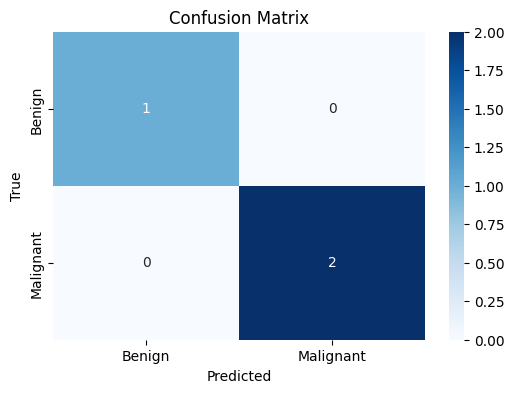

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


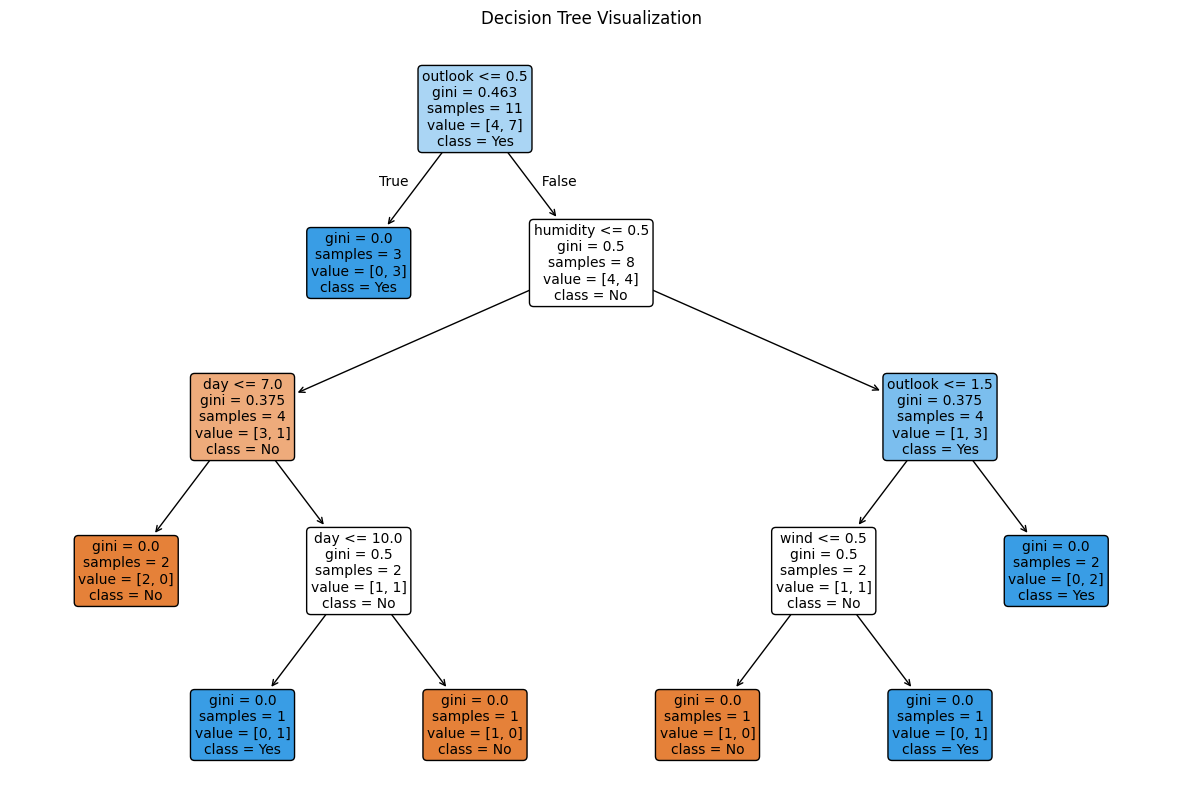

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(15, 10))  # Adjust size as needed
plot_tree(
    model,
    feature_names=X.columns,  # Provide the feature names
    class_names=['No', 'Yes'],  # Provide the class names (adjust based on your target variable)
    filled=True,  # Color the nodes for better visual understanding
    rounded=True,  # Round the boxes
    fontsize=10  # Adjust font size
)
plt.title("Decision Tree Visualization")
plt.show()
